In [1]:
from aggregate_statistics import make_rosette_images, germ_band_length
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [6]:
from aggregate_statistics import make_rosette_images, germ_band_length
with h5py.File("runs/pressure_run4.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])

In [3]:
ints = germ_band_length(poss, cell_properties, 2)

# plt.plot(ints)

5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min
5000 points in germ band
[100. 100. 100.] max
[0. 0. 0.] min


(50.0, 120.0)

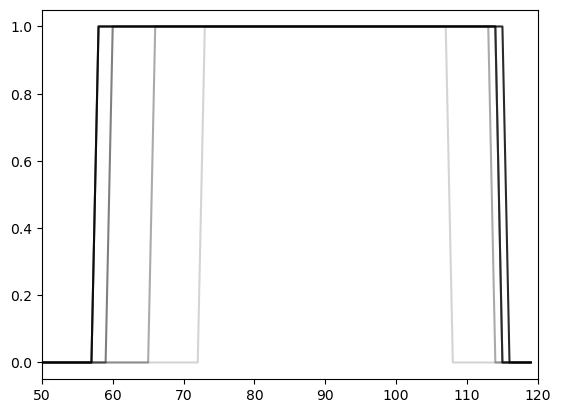

In [4]:
for i in range(ints.shape[0]):
    plt.plot(ints[i], color = "black", alpha = (i+1)/(ints.shape[0]+1), )

plt.xlim(50, 120)

counts.shape (500, 5000)


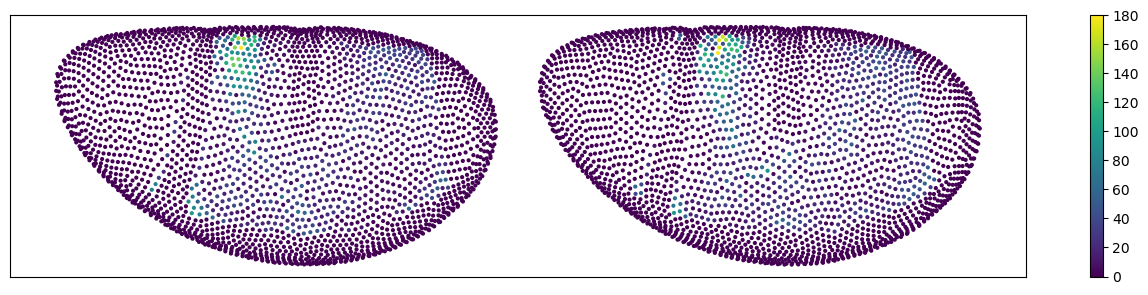

(5000,)


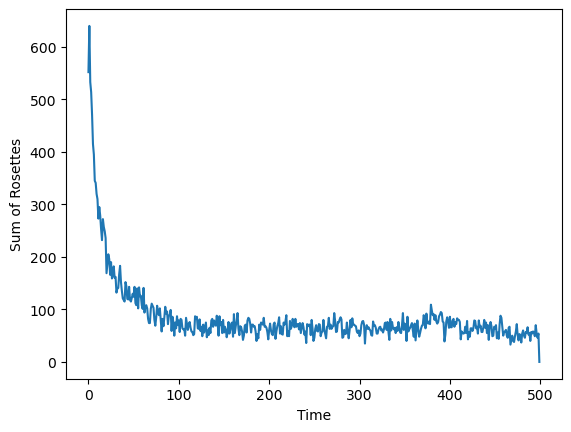

In [17]:
from aggregate_statistics import make_rosette_images, germ_band_length
import numpy as np
import matplotlib.pyplot as plt
import h5py

with h5py.File("runs/pressure_run5.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])


for scl in [5, ][::-1]:
    rosettes, sumcount, vecs_between = make_rosette_images(poss, cell_properties, types = [1], scale = scl)

    plt.show()
    

# print(germ_band_length(poss, cell_properties))

In [37]:
toomany = rosettes.sum(axis=0) > 20

tooearly = rosettes[50:,:]

clean_r = tooearly

clean_r[:,toomany] = 0




In [31]:
poss.shape

(2501, 5000, 3)

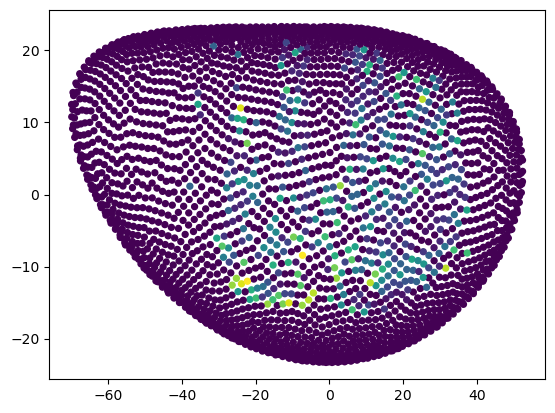

In [42]:
cy = poss[0,:,1] < 0
plt.scatter(poss[0,:,0][cy], poss[0,:,2][cy], c = clean_r.sum(axis = 0)[cy], s = 18)
# plt.scatter(poss[0,:,0], poss[0,:,2], c = clean_r.sum(axis = 0), s = 10)

In [13]:
# extract daniels stripe
import numpy as np
import matplotlib.pyplot as plt
import h5py


with h5py.File("runs/finale.hdf5", "r") as f:
    poss = np.array(f["x"])

dstripe = (poss[0][:,0] > 32)*(poss[0][:,0] < 45)

d_poss = poss[:2000,dstripe]

# only take every 3rd time step

oned = d_poss.reshape(-1,3)

# save as csv
np.savetxt("daniels_stripe.csv", oned, delimiter = ",")

In [14]:
oned.reshape(-1,488, 3).shape

(2000, 488, 3)

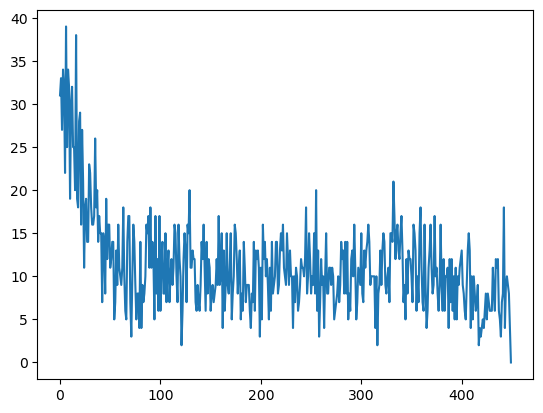

In [45]:
plt.plot(clean_r.sum(axis = 1))

In [5]:
importance = np.array(np.abs([v[1]/np.linalg.norm(v) for v in vecs_between]))

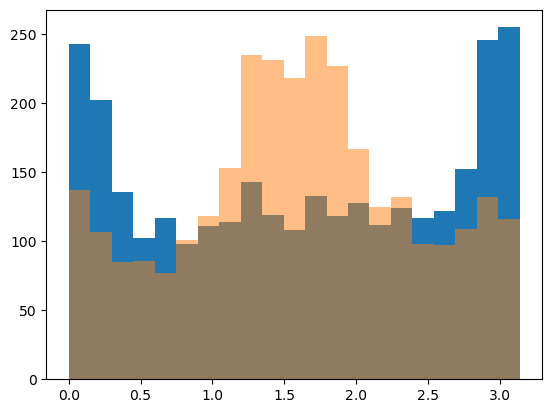

In [6]:
angles = np.abs([np.arctan2(max(np.abs(v[1]),np.abs(v[1])), (v[0])) for v in vecs_between])
angles2 = np.abs([np.arctan2(max(np.abs(v[2]),np.abs(v[2])), (v[0])) for v in vecs_between])


plt.hist(angles[:3000], bins = 21,)
plt.hist(angles2[:3000], bins = 21, alpha = 0.5)
plt.show()

In [8]:
with h5py.File("runs/gradual_l3_startx_9.hdf5", "r") as f:
    attrs = dict(f.attrs)
    poss = np.array(f["x"])
    cell_properties = np.array(f["properties"][0])
    p = np.array(f["p"])
    q = np.array(f["q"])


movement_magnitudes = np.linalg.norm(poss[-1] - poss[0], axis=1)


cell_names = ["Bulk", "Germ Band", "Invagination", "PMG1", "PMG2", "Furrows"]
colors = ["green", "red", "blue", "orange", "lightblue", "pink"]

fig, axs = plt.subplots(3, 2, figsize=(7, 9), sharex="col", sharey="row")

axs = axs.flatten()


for i, cell_type in enumerate(np.unique(cell_properties)):
    axs[i].hist(movement_magnitudes[cell_properties == cell_type], bins=20, alpha=1, label=f"Cell type {cell_type}", density=True, color=colors[i])
    # .xlabel("Movement magnitude")
    axs[i].set_title(cell_names[int(cell_type)])

fig.suptitle("Movement magnitude distribution for different cell types")

fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'runs/gradual_l3_startx_9.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

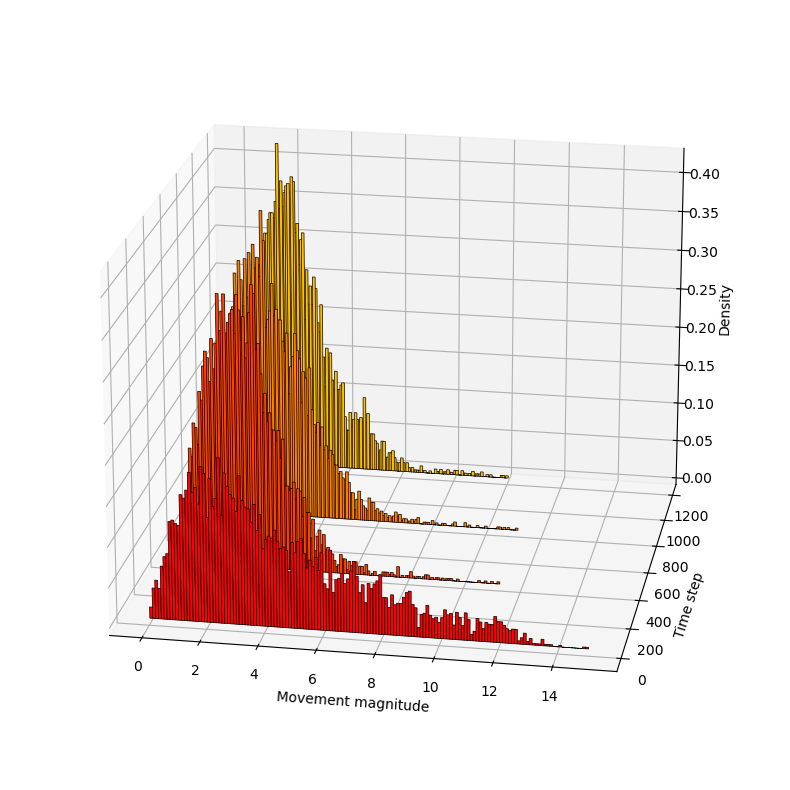

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


cell_type = 1

every = 400



for t in range(1, len(poss)-every, every):
    movement_magnitudes = np.linalg.norm(poss[t + 200] - poss[t], axis=1)

    correct_type = movement_magnitudes#[cell_properties == cell_type]

    bins, edges = np.histogram(correct_type, bins=150, density=True)

    ax.bar(edges[:-1], bins, zs=t, zdir='y', alpha=1, color=(1,t/(len(poss)-every), 0), width=0.1, edgecolor = "black", linewidth=.5)

ax.set_xlabel("Movement magnitude")
ax.set_ylabel("Time step")
ax.set_zlabel("Density")

# change the view angle
ax.view_init(elev=20, azim=-80)



1) Convince stas
2) Make 3d hist
3) Germ band length
4) make clustering on movements

